#Cross validation of the dataset 

In [4]:
#Preprocessing the dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report,precision_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import cross_val_score

#Transfert learning 
#from keras.applications.vgg16 import VGG16, preprocess_input

In [5]:
data = pd.read_csv('data\Tumeurs.csv')


In [6]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

X = X/255 

In [7]:
X = np.array(X)
X = X.reshape(10015,784)

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

lr = LogisticRegression(C =  10.0, penalty =  'l2')


scores = cross_val_score(lr, X, y, cv=5)

c:\Users\mathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KeyboardInterrupt: 

In [ ]:
scores

array([0.67698452, 0.68647029, 0.67099351, 0.56714928, 0.59111333])

### Data Training_augmented

In [8]:
data_training = pd.read_csv('data\Tumeurs_train.csv')
data_training = data_training.drop('Unnamed: 0', axis = 1)

In [9]:
#Plot 9 images 
y = data_training['label'].copy()
X = data_training.drop('label', axis=1).copy()

X = X/255
X = np.array(X)
X = X.reshape(len(X),784)

In [10]:
#Let's name our label with the encoded label they have with a dicitonary 
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

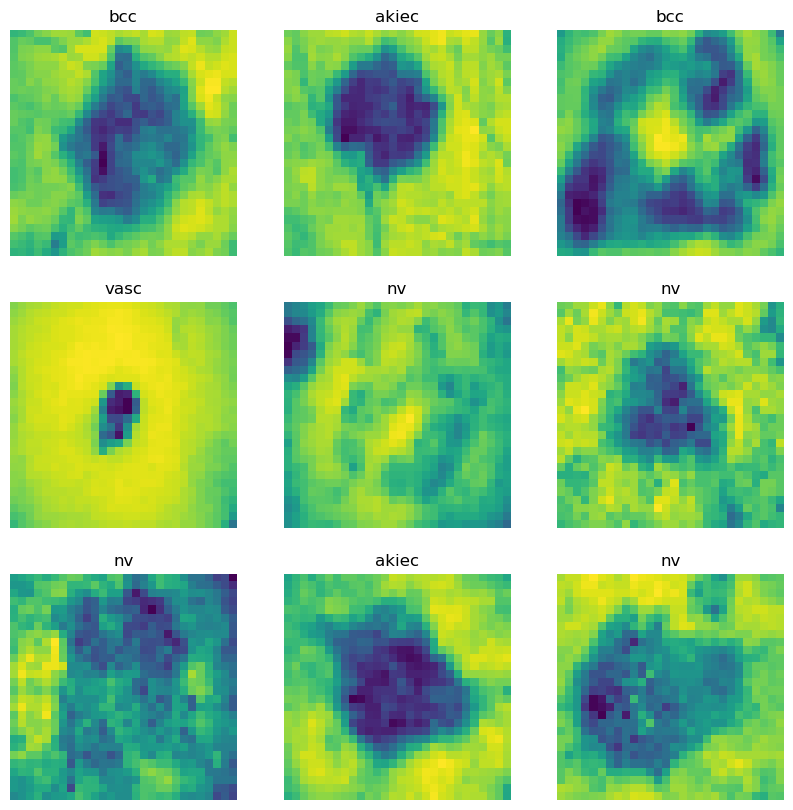

In [11]:
#plot the 9 first images with their label
X = np.array(X)
images = X.reshape(-1, 28, 28, 1)
plot = plt.figure(figsize=(10, 10))
for i in range(9):
    plot.add_subplot(3, 3, i+1)
    plt.imshow(images[i+262])
    plt.title(label_mapping[y[i+262]])
    plt.axis('off')

We know that there is some miss classification between the 0 and the 2. 
Rappelons que le 2 (bkl) et le 0 : (nv) sont 

### Amélioration des images par des filtres (renforcement de bords)

In [12]:
import numpy as np
from skimage import data
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib.pyplot as plt

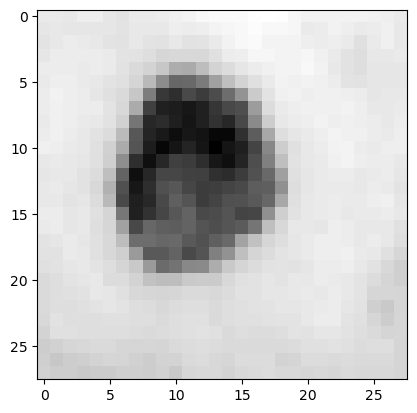

In [31]:
image_test = np.array(images[240]).reshape(28,28)
plt.imshow(image_test, cmap = 'gray')

In [27]:
image_test.shape

(28, 28)

### Augmentation de contraste 

In [32]:
def displayTwoBaWImages(img1, img2):
    _, axes = plt.subplots(ncols=2)
    axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
    axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

In [33]:
kernel_inccontrast = np.array([[0,0,0,0,0], 
                               [0,0,-1,0,0], 
                               [0,-1,5,-1,0], 
                               [0,0,-1,0,0], 
                               [0,0,0,0,0]])

In [34]:
image_test.shape

(28, 28)

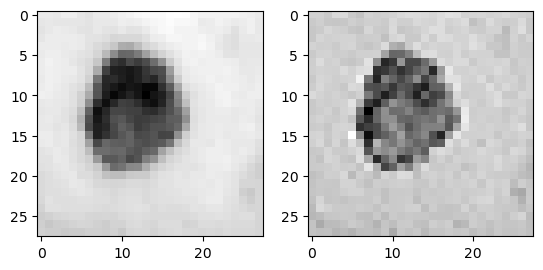

In [35]:
imgcontrast = signal.convolve2d(image_test, 
                              kernel_inccontrast, 
                              boundary='symm', 
                              mode='same')
displayTwoBaWImages(image_test, imgcontrast)

We have imgcontrast which is better i think. 

In [38]:
imgcontrast.shape

(28, 28)

In [102]:
# Let's do a function which with a dataset as input, take all the images and contrast them to after apply the convolution. 

data_training = pd.read_csv('data\Tumeurs_data_stabled.csv')
data_training = data_training.drop('Unnamed: 0', axis = 1)

def preprocessing_data_convolution(data) : 

    X_convolved = []

    #1. Separate the dataset
    y = data['label'].copy()
    print(np.array(y).shape)
    X = data.drop('label', axis=1).copy()
    X = X/255
    X = np.array(X)
    #2. Loop to convolve each images. 
    for image in range(0, len(data)) : 
        image_test = np.array(X[image]).reshape(28,28)
        image_conv  = signal.convolve2d(image_test, 
                              kernel_inccontrast, 
                              boundary='symm', 
                              mode='same')
        
        X_convolved.append(image_conv)
        #print(np.array(X_convolved).shape)
        #plt.imshow(image_test, cmap = 'gray')
    return np.array(X_convolved)


        

In [103]:
result = preprocessing_data_convolution(data_training)

(770,)


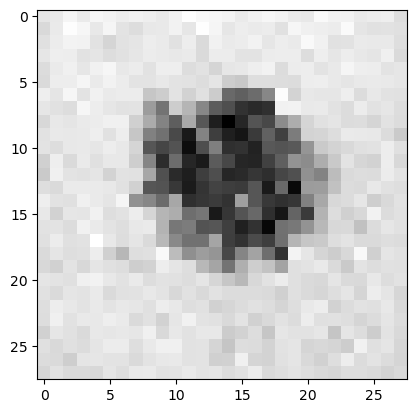

In [104]:
X = np.array(result)
images = X.reshape(-1, 28, 28, 1)
image_test = np.array(images[15]).reshape(28,28)
plt.imshow(image_test, cmap = 'gray')

In [105]:
X.shape

(770, 28, 28)

#Anohter CNN 

In [106]:
X = X.reshape(770 ,28,28,1)

In [85]:
y = data_training['label'].copy()

In [87]:
np.array(y).shape

(770,)

In [107]:
y = data_training['label'].copy()
X = X.reshape(770 ,28,28,1)

#X = X.reshape(len(data_stabled),784)

#Scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)


In [108]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model =tf.keras.models.Sequential([
    #tf.keras.layers.GaussianBlur(sigma=(0, 3.0)),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu" , input_shape = (28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") , 
    #tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,  
    #tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    #
    # tf.keras.layers.BatchNormalization(),
  
    
    #tf.keras.layers.Conv2D(256,(3,3),activation = "relu") , 
    #tf.keras.layers.Conv2D(256,(3,3),activation = "relu") , 
    #tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate = 0.15), #Important parameter
    # tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.GlobalAveragePooling2D(),
    
    #tf.keras.layers.Dense(units = 256, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.Dense(units = 128, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.Dense(units = 64, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(), #Convert 3d in 1d features vectors 
    #tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(7,activation = "softmax")])

In [109]:
#model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100,callbacks = [early], validation_data=(X_val, y_val))
#history = model.fit(X_train, y_train, epochs=100,callbacks = [early])

Epoch 1/100


c:\Users\mathi\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


16/16 [==============================] - 1s 22ms/step - loss: 2.1584 - accuracy: 0.1732 - val_loss: 1.9501 - val_accuracy: 0.0926
Epoch 2/100
16/16 [==============================] - 0s 14ms/step - loss: 1.7652 - accuracy: 0.2887 - val_loss: 1.9430 - val_accuracy: 0.0926
Epoch 3/100
16/16 [==============================] - 0s 15ms/step - loss: 1.6852 - accuracy: 0.3361 - val_loss: 1.9408 - val_accuracy: 0.2407
Epoch 4/100
16/16 [==============================] - 0s 15ms/step - loss: 1.5942 - accuracy: 0.3979 - val_loss: 1.9396 - val_accuracy: 0.0926
Epoch 5/100
16/16 [==============================] - 0s 15ms/step - loss: 1.5716 - accuracy: 0.3897 - val_loss: 1.9351 - val_accuracy: 0.0926
Epoch 6/100
16/16 [==============================] - 0s 16ms/step - loss: 1.5461 - accuracy: 0.3732 - val_loss: 1.9289 - val_accuracy: 0.2778
Epoch 7/100
16/16 [==============================] - 0s 15ms/step - loss: 1.4488 - accuracy: 0.4557 - val_loss: 1.9324 - val_accuracy: 0.0926
Epoch 8/100
16/16 

In [110]:
model_acc = model.evaluate(X_test, y_test)[1]

print("Test Accuracy: {:.3f}%".format(model_acc * 100))

8/8 [==============================] - 0s 4ms/step - loss: 1.4111 - accuracy: 0.4892
Test Accuracy: 48.918%


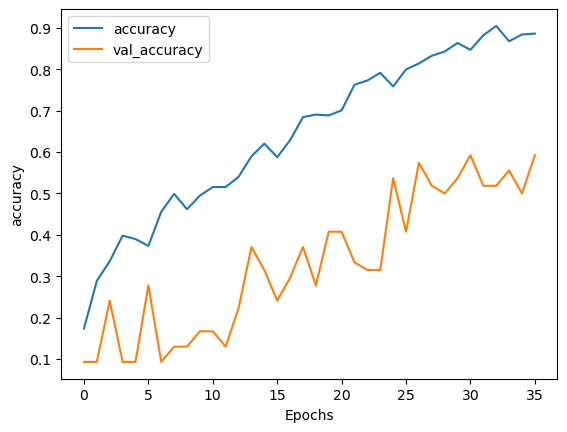

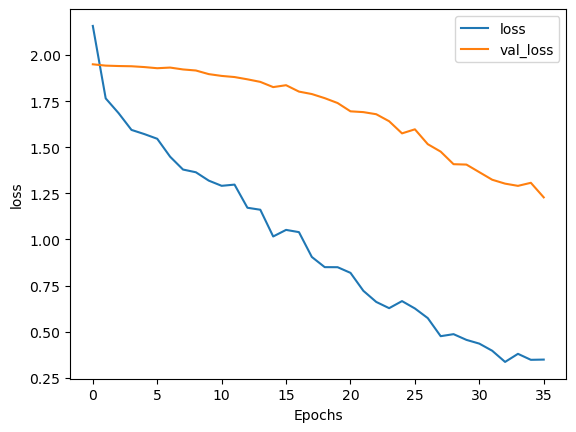

In [111]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [112]:
y_true = np.array(y_test)

label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())

              precision    recall  f1-score   support

           0       0.62      0.60      0.61        30
           1       0.47      0.55      0.51        29
           2       0.32      0.22      0.26        27
           3       0.69      0.49      0.57        37
           4       0.38      0.47      0.42        34
           5       0.51      0.50      0.51        44
           6       0.45      0.57      0.50        30

    accuracy                           0.49       231
   macro avg       0.49      0.49      0.48       231
weighted avg       0.50      0.49      0.49       231



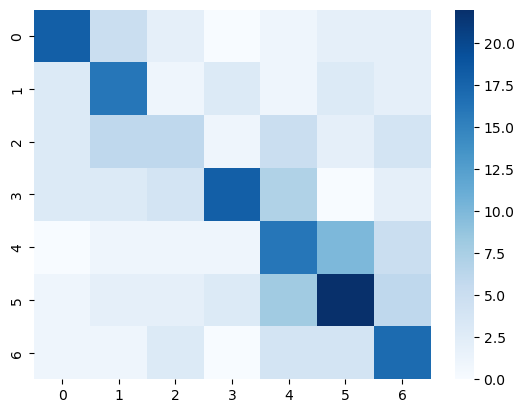

In [113]:
import seaborn as sn

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
cr2 = classification_report(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, cmap='Blues')
print(cr2)
#print(cm) 